In [1]:
# Imports
from dataloader import get_utkface_loaders
import numpy as np
import matplotlib.pyplot as plt
import torchvision.utils as vutils
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from models import *

In [2]:
USE_GPU = True
num_class = 100
dtype = torch.float32 # we will be using float throughout this tutorial

if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

# Constant to control how frequently we print train loss
print_every = 100

print('using device:', device)

using device: cpu


In [3]:
num_classes = 20
model = ResNetDropout(num_classes)
model.load_state_dict(torch.load('models/best_model.pth', map_location=device))
model.eval()


ResNetDropout(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
  (maxPool): MaxPool2d(kernel_size=(3, 3), stride=2, padding=1, dilation=1, ceil_mode=False)
  (relu): ReLU()
  (conv2_x): Sequential(
    (0): ResNetBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (dropout): Dropout(p=0.25, inplace=False)
      (shortcut): Sequential()
    )
  )
  (conv3_x): Sequential(
    (0): ResNetBlock(
      (conv1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(128,

In [4]:
def age_class_to_str(num):
    return f"{num*5} - {(num+1)*5-1}"
print(age_class_to_str(1))

5 - 9


In [5]:
def get_images_and_preds(loader, model, n=10):
    num_correct = 0
    num_samples = 0
    model.eval()  # set model to evaluation mode
    with torch.no_grad():
        for x, y in loader:
            x = x.to(device=device, dtype=dtype)  # move to device, e.g. GPU
            y = y.to(device=device, dtype=torch.long)
            scores = model(x)
            _, preds = scores.max(1)
            num_correct += (preds == y).sum()
            num_samples += preds.size(0)
        acc = float(num_correct) / num_samples
        print('Got %d / %d correct (%.2f)' % (num_correct, num_samples, 100 * acc))
    return acc, x, y, preds

In [6]:
target_column = 'age_class'
num = 10
train_loader, valid_loader, test_loader = get_utkface_loaders(target_column, batch_size=64, num_train=num, num_valid=num, num_test=num)

100%|██████████| 23708/23708 [00:00<00:00, 929176.02it/s]


In [7]:
acc, x, y, preds = get_images_and_preds(test_loader, model, num)


Got 5 / 10 correct (50.00)


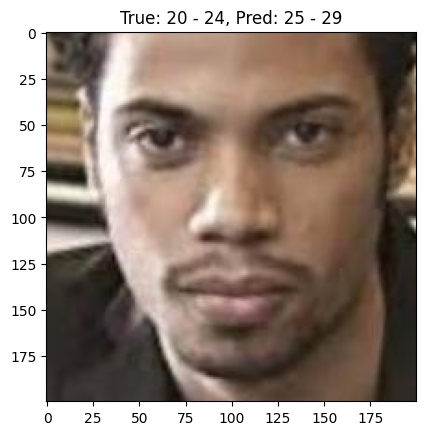

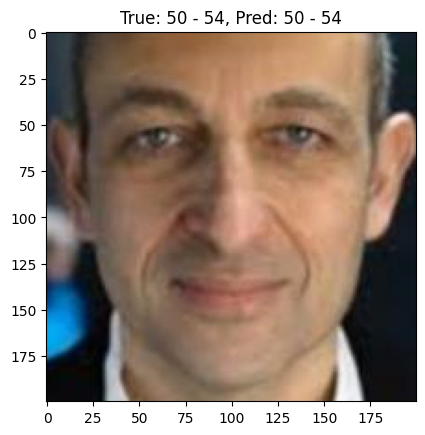

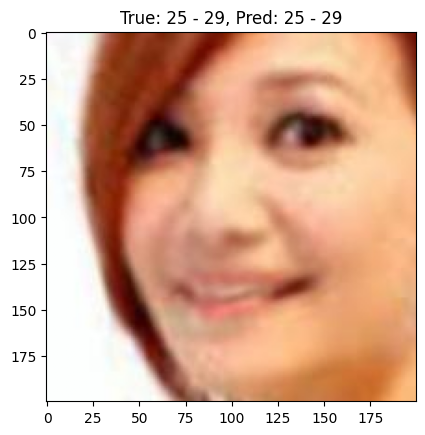

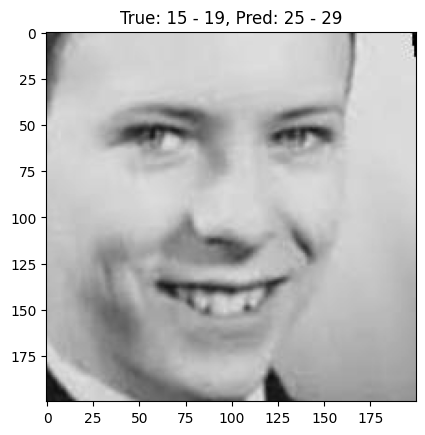

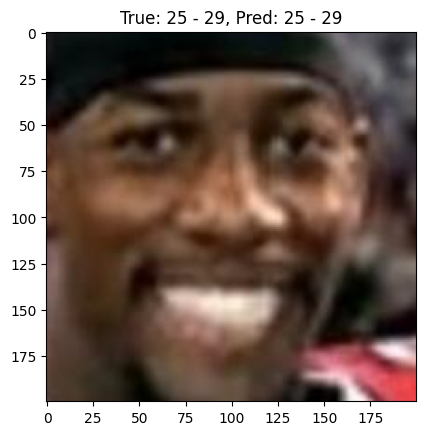

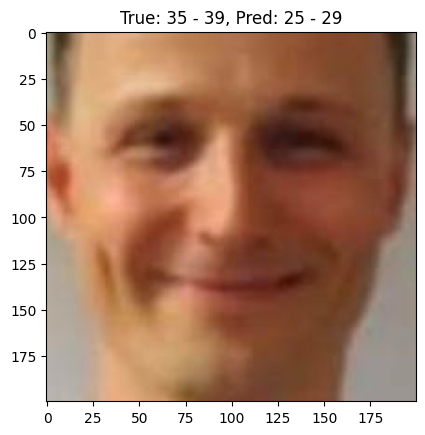

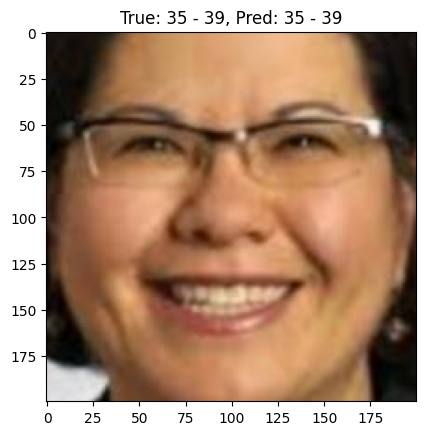

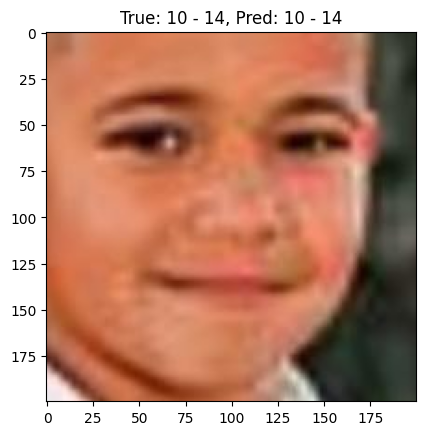

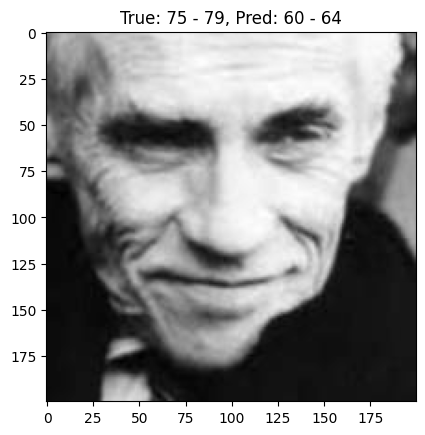

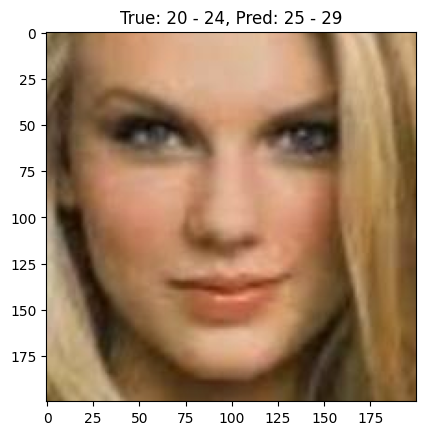

In [ ]:
for i in range(nums):
    plt.imshow(np.transpose(vutils.make_grid(x[i], normalize=True), (1, 2, 0)))
    plt.title(f"True: {age_class_to_str(y[i].item())}, Pred: {age_class_to_str(preds[i].item())}")
    plt.show()